In [ ]:
import tensorflow as tf
print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.19.0


In [ ]:
!wget https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
!tar -xzf flower_photos.tgz

--2026-02-18 16:00:16--  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz’

flower_photos.tgz   100%[===================>] 218.21M   130MB/s    in 1.7s    

2026-02-18 16:00:18 (130 MB/s) - ‘flower_photos.tgz’ saved [228813984/228813984]



In [ ]:
from google.colab import files
files.upload()

Saving archive.zip to archive (1).zip
Buffered data was truncated after reaching the output size limit.

In [ ]:
!unzip archive.zip

Archive:  archive.zip
replace Fruit Freshness Dataset/Fruit Freshness Dataset/Apple/Fresh/apple_fresh_001.jpg (1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import os
os.listdir()

['.config',
 'README.dataset.txt',
 'archive.zip',
 'Fruit Freshness Dataset',
 'flower_photos.tgz',
 'flower_photos',
 'sample_data']

In [ ]:
os.listdir('Fruit Freshness Dataset')

['Fruit Freshness Dataset']

In [ ]:
import os
os.listdir('Fruit Freshness Dataset')

['Fruit Freshness Dataset']

In [ ]:
import os
os.listdir('Fruit Freshness Dataset/Fruit Freshness Dataset')

['Strawberry', 'Banana', 'Apple']

In [ ]:
dataset_path = 'Fruit Freshness Dataset/Fruit Freshness Dataset'

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2   # 80% train, 20% validation
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 424 images belonging to 3 classes.
Found 105 images belonging to 3 classes.


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')   # 3 classes
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 364ms/step - accuracy: 0.4303 - loss: 3.2484 - val_accuracy: 0.7524 - val_loss: 0.9496
Epoch 2/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.6818 - loss: 0.8091 - val_accuracy: 0.9905 - val_loss: 0.3489
Epoch 3/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.9104 - loss: 0.3803 - val_accuracy: 0.9810 - val_loss: 0.1017
Epoch 4/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 0.9372 - loss: 0.1682 - val_accuracy: 0.9810 - val_loss: 0.1204
Epoch 5/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step - accuracy: 0.9534 - loss: 0.1216 - val_accuracy: 0.9619 - val_loss: 0.1128


In [ ]:
model.save("fruit_freshness_model.h5")

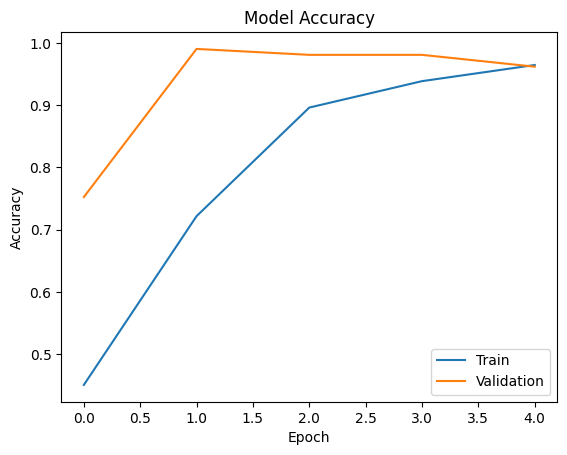

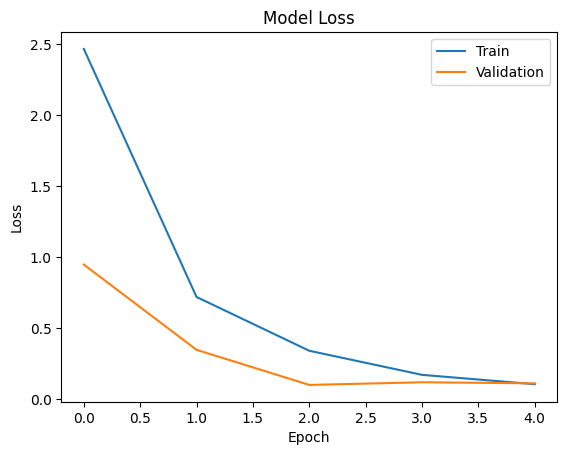

In [ ]:
import matplotlib.pyplot as plt

# Accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

# Loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = list(uploaded.keys())[0]

img = image.load_img(img_path, target_size=(150,150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

prediction = model.predict(img_array)

class_indices = train_generator.class_indices
classes = list(class_indices.keys())

predicted_class = classes[np.argmax(prediction)]

print("Predicted Class:", predicted_class)